<a href="https://colab.research.google.com/github/NP330/organization/blob/master/NP330_Lab1_19_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NeuPsy330 

## Labs Overview
Labs for NeuPsy330 will focus on understanding computational models of human cognition by running and modifying working models along with constructing new models that solve interesting challenges.  The format for labs is fairly consistent:  1) We'll start with some useful background information (about human cognition, programming tools, and sometimes a review of relevant math);  2) Then we'll introduce a working model of a cognitive ability or process, break it down into the computational components, and; 3) Gain a deeper understanding by modifying those components and building new functionality out of the components.  Each lab progresses from highly structured instruction to increasingly open-ended problem solving, often working in teams.  The goal is for you to gain hands-on experience tinkering with real models and developing the conceptual understanding and technical skills to begin building your own models.  

### Background & Software
Labs will use the programming language Python with a cognitive neuroscience modeling environment called PsyNeuLink.  No previous programming experience is required to join the course, but if you are new to programming or unfamiliar with Python then you must plan to intensively familiarize yourself with coding in Python during the first few weeks of the course.  Some links to resources are provided below.  We also encourage you to go beyond the course materials and find online resources that help you learn, such as [Stack Overflow](https://stackoverflow.com/)  

The document you are currently reading is a Jupyter Notebook that combines word processing with executable code.  The file is segmented into cells, and with the menu above (right below "Widgets") you can designate prose cells as Markdown for writing text, and code cells as Code.  When you select a cell and hit the Play button above it will format Markdown cells into text or execute the code in Code cells.  Double click on this cell now to see what a Markdown cell looks like before formatting.  You'll see number signs / hashtags / # at the start of a line are used to designate headings and various subheadings.  When you submit labwork and homework assignments they should be formatted like this document, using Markdown cells for text and Code cells for code.                         

#### Python Resources

[5 minute primer on Python](https://www.udacity.com/learn/python)  
[Free Intro to Python course](https://www.udacity.com/course/introduction-to-python--ud1110)  
[Free Intro to Programming course, using Python](https://www.udacity.com/course/programming-foundations-with-python--ud036)  


#### PsyNeuLink Documentation

[PsyNeuLink Documentation](https://princetonuniversity.github.io/PsyNeuLink/)


## Lab 1

In today's lab we will start with some of the basics for using PsyNeuLink.  The following section is an edited version of the tutorial that comes with the PsyNeuLink ...  

# PsyNeuLink Tutorial

PsyNeuLink is an integrated language and toolkit for creating cognitive models.  It makes cognitive modeling more accessible to beginners and easier to use for experts by providing standard building blocks (Drift Diffusion Models, Neural Nets, etc.) and the means to connect them together in a single environment. PsyNeuLink is designed to make the user think about computation in a "mind/brain-like" way while imposing minimal constraint on the type of models that can be implemented.

PsyNeuLink is a declarative, object-oriented language.  This means that you specify what you want to build, not how you want to build it -- PsyNeuLink uses smart defaults to automatically construct all the working components and their connections.  Afterward, if you want to modify and customize the components and connections there are a variety of options (with more being added every week).  Declarative object-oriented programming can be contrasted with procedural programming, where you specify every detail of how to build what you want to build.  A big part of learning to use PsyNeuLink is becoming familiar with all the pre-packaged functionality and smart defaults.  And perhaps the best way to get familiar is tinkering with working models and reading through the supporting documentation.             


## Tutorial Overview

This tutorial is meant to get you accustomed to the structure of PsyNeuLink and be able to construct basic models. Starting with a simple 1-to-1 transformation, we will build up to making the Stroop model from Cohen et al. (1990). Let's get started!

In [1]:
!pip install psyneulink
import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline
import random

    100% |████████████████████████████████| 1.2MB 16.3MB/s 
  Running setup.py bdist_wheel for toposort ... - done
  Stored in directory: /root/.cache/pip/wheels/ed/a8/38/946bc153bb06e870947f09601a66291c8ea0ddb5275b20314d
  Running setup.py bdist_wheel for typecheck-decorator ... - done
  Stored in directory: /root/.cache/pip/wheels/ef/12/5a/fd05ccc14a1471b48e92c86ef837164eeeb26d80acdf2084f3
Successfully built toposort typecheck-decorator


In [0]:
import psyneulink as pnl

The two previous cells import functions from libraries.  When you see abbreviations (np. plt. or pnl. -- as in pnl.TransferMechanism) in the following examples, it indicates which library the function came from.   

### Creating a mechanism

*[Mechanisms](https://princetonuniversity.github.io/PsyNeuLink/Mechanism.html)* are the basic units of computation in PsyNeuLink. At their core is a parameterized *function* (parameters are variables within a function: for a simple example multiply-by-n, multiply is the function and n is the parameter).  Mechanisms also contain the machinery to interact with input, output, control, and learning signals. Our first mechanism will perform a linear transformation on a scalar input (multiply-by-n is one kind of linear transformation; a scalar is a number that has magnitude but no direction, unlike a vector that has both magnitude and direction). For now, we will initialize the mechanism by specifying its *function*.

In [0]:
linear_transfer_mechanism = pnl.TransferMechanism(
    function=pnl.Linear(slope=1, intercept=0))

In this case, we didn't actually need to specify the slope and intercept as the function will default to reasonable values (if we didn't specify it would have defaulted to a slope of 1 and intercept of 0).  The function above has two parameters, slope and intercept.  If we wrote the equation as y = ax + b, a is the slope, b is the input, x is the input and y is the output.  As a function we write this f(x) = ax + b.  Note that you can change these parameter values of a=1 and b=0 to other numbers -- because parameters are variables within a function.  

Some transfer functions other than Linear that you could use are: Exponential, Logistic, or SoftMax.  An Exponential function raises some input number to an exponent (e.g. squaring a number is an exponent of 2, and the square root of a number is an exponent of 1/2).  The output of a Logistic function is bounded between 0 and 1, and we'll learn a bit more about it later in this tutorial.  SoftMax is a more complex function that is often used in neural networks, and you don't need to understand how it works yet.     

Next let's try inputing the number 2 to our linear transfer mechanism...

In [4]:
linear_transfer_mechanism.execute([2])

array([[2.]])

The number 2 was input to the function.

Try reparamaterizing the mechanism (change the slope and/or intercept) and executing again before moving on...  

If you change slope to 3, run the code by pressing play, then change the input value to 4, what output do you get?  Why?  Can you predict what will happen if you change the slope to 4 and intercept to 5 and run both cells again with an input of 3? 

Another way of expressing this function is (slope x input) + intercept. 

### Logistic Function

The following cell plots a logistic function with the default parameters; gain = 1, bias = 0, offset = 0.    

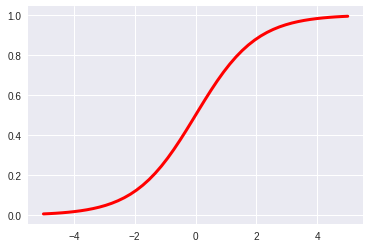

In [5]:
logistic_transfer_demo = pnl.TransferMechanism(function=pnl.Logistic(gain=1, bias=0, offset=0))
logistic_transfer_demo.plot()

In the cell below you can plug a single number into this function and get an output value.  Your input corresponds to a point on the x axis, and the output is the corresponding y value (height of the point on the curve above the x you specified).   

In [6]:
logistic_transfer_demo.execute([-2])

array([[0.11920292]])

The logistic function is useful because it is bounded between 0 and 1.  Gain determines how steep the central portion of the S curve is, with higher values being steeper.  Bias shifts the curve left or right.  You can turn the logistic function effectively into a step function that works as a threshhold by increasing gain.  The step in the step function (where it crosses through 0.5 on the Y axis) is located on the X axis at (offset/gain) + bias. 


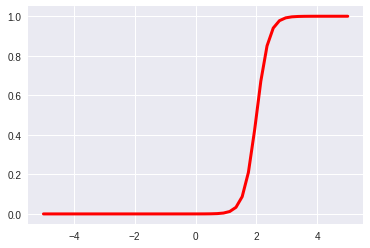

In [7]:
logistic_transfer_demo2 = pnl.TransferMechanism(function=pnl.Logistic(gain=5,offset=10, bias=0))
logistic_transfer_demo2.plot()

Negative values of gain mirror reverse the S curve accross the vertical axis, centered at the x value of (offset/gain)+bias.  Below notice that offset/gain is -2 (10/-5), and at an X value of -2 the Y value is 0.5.  

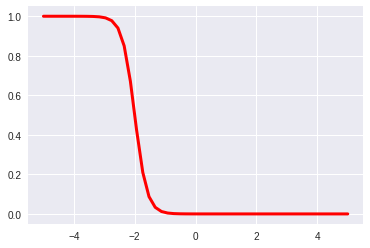

In [8]:
logistic_transfer_demo3 = pnl.TransferMechanism(function=pnl.Logistic(gain=-5, bias=0, offset=10))
logistic_transfer_demo3.plot()

### Gain, Offset, & Bias

Imagine you have a neuron that has to decide whether to fire or not based upon its own parameters and some input.  Let's say this artificial neuron is a greater-than-0-detector for its input -- if the input is greater than 0 it fires, otherwise it will not fire.  Now if the neuron receives input [4] it will fire.  If it receives [-3] it will not fire.  In this simplified scenario, gain is a parameter that multiplies input by some value (e.g. multiply everyting by 2, or by 0.15, or whatever you choose), and bias is a parameter that changes the threshold (e.g. bias -2 shifts the threshold down from 0 to -2, turning the neuron into a greater than -2 detector, while bias +2 shifts the threshold up to 2).  

The actual logistic function is a bit more complicated than this example: within the logistic function bias and gain are parameters in the denominator's exponent -- you don't need to know the exact equation, but one reason a logistic function is useful is that its output is bounded between 0 and 1.  

Try changing the values of bias, offset, and gain in the two cells above, and see how it impacts the graph (execute the cell two above and then the cell one above to see the effect after you change these parameters).  The default values are gain = 1, offset = 0, and bias = 0.  

You should notice two propoerties of the logistic function: 1) the steepness of the S-shaped curve [gain], and 2) where the midpoint y-value of 0.5 aligns with the x axis [bias].  **Increasing gain above 1 will make the curve steeper.  Decreasing gain to a fraction between 0 and 1 will make the curve shallower.  Increasing or decreasing bias will shift the curve right or left.  If you want to shift the curve proportional to gain, offset can do this, shifting the curve left or right by (offset/gain).** 

### Organizing into Processes

Generally with PsyNeuLink, you won't be executing mechanisms as stand-alone entities. Rather, they will be encapsulated inside *[Processes](https://princetonuniversity.github.io/PsyNeuLink/Process.html)* and later *[Systems](https://princetonuniversity.github.io/PsyNeuLink/System.html)*. A Process is a collection of mechanisms and projections to be executed serially. You can think of all this with an analogy to digestion.  Chew the food first, then swallow and it is "projected" to the stomach, then the stomach soaks food in digestive acid to further break it down, then the output is projected to the small intestine where nutrients are absorbed.  Note that the order matters -- the small intestine wouldn't be effective if food hadn't been chewed and then broken down in the stompach. 

The next level up, you can combine Processes to build Systems.  A Mechanism takes some input, performs a function, and delivers an output.  The same is true of a Process and System -- they take some input, perform multiple functions, and deliver some output.  A powerful feature of this input-output architecture is that an entire System today can become a Mechanism tomorrow in a more complex Process or System, and that System can become a Mechanisms in yet a more complex System, all the way up. [Note: this is true in principle, but PsyNeuLink is actively under development and such scaled up functionality is not all implemented.]  

The main parameter when initializing a Process is its pathway, which is the order in which the Mechanisms will execute. Of course, with only one Mechanism in our Process, the list has just one element.

To better see how the process runs, we can also turn on output reporting. Reporting can happen at every level in PsyNeuLink so we set the preference for both the process and mechanism.

In [0]:
linear_transfer_process = pnl.Process(pathway = [linear_transfer_mechanism])

linear_transfer_mechanism.reportOutputPref = True
linear_transfer_process.reportOutputPref = True

In [10]:
linear_transfer_process.show()


---------------------------------------------------------

Process-0

	Learning enabled: False

	Mechanisms:
		TransferMechanism-0

	Origin Mechanism: 
		TransferMechanism-0

	Terminal Mechanism: 
		TransferMechanism-0
			RESULTS

---------------------------------------------------------


In [11]:
linear_transfer_process.execute([4])



****************************************


''Process-0' process_base' executing with:
- pathway: ['TransferMechanism-0']
- input: [[4]]

'TransferMechanism-0'  executed:
- input:  4.0
- params:
	convergence_criterion: 0.01
	convergence_function: Distance Function-2
		intercept: 0
		slope: 1
	function: Linear Function-5
		intercept: 0
		slope: 1
	initial_value: None
	integration_rate: 0.5
	integrator_mode: False
	max_passes: 1000
	noise: 0.
- output: 2.0

''Process-0' process_base' completed:
- output: 4.0


****************************************



array([4.])

Let's turn off the reporting and look at our process' output over a wider range of values.

---------------------------------------------------

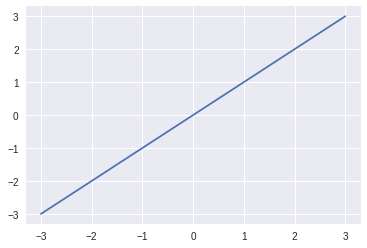

In [12]:
linear_transfer_mechanism.reportOutputPref = False
linear_transfer_process.reportOutputPref = False

xVals = np.linspace(-3, 3, num=51) # create 51 points between -3 and +3
yVals = np.zeros((51,))
for i in range(xVals.shape[0]):
    yVals[i] = linear_transfer_process.execute([xVals[i]])[0]
    # Progress bar
    print("-", end="")
plt.plot(xVals, yVals)
plt.show()

Now let's put it all together and make a new transfer process, this time with a logistic activation function. We will also extend our mechanism by giving it two units (operating on a 1x2 matrix) rather than the default one (operating on a scalar).

---------------------------------------------------

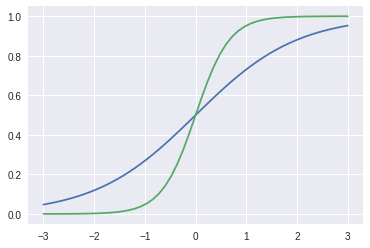

In [13]:
# Create the mechanism
logistic_transfer_mechanism = pnl.TransferMechanism(default_variable=[0, 0],
                                                function=pnl.Logistic(gain=1,
                                                                  bias=0))

# Package into a process
logistic_transfer_process = pnl.Process(pathway=[logistic_transfer_mechanism])

# Iterate and plot
xVals = np.linspace(-3, 3, num=51)
y1Vals = np.zeros((51,))
y2Vals = np.zeros((51,))
for i in range(xVals.shape[0]):
    # clarify why multiplying times 2
    output = logistic_transfer_process.execute([xVals[i], xVals[i] * 3])
    y1Vals[i] = output[0]
    y2Vals[i] = output[1]
    # Progress bar
    print("-", end="")
plt.plot(xVals, y1Vals)
plt.plot(xVals, y2Vals)
plt.show()

The `default_variable` parameter serves a dual function. It specifies the dimensionality of the mechanism as well as providing the inputs that will be given in the absence of explicit input at runtime.  You can also specify the dimensionality using "size", e.g. size=2 will also create default_variable=[0,0].

In [0]:
logistic_transfer_mechanism2 = pnl.TransferMechanism(default_variable=[0, 0],
                                                function=pnl.Logistic(gain=100,
                                                                  offset=100))

In [16]:
logistic_transfer_mechanism2.execute([.9,1.1])

array([[4.53978687e-05, 9.99954602e-01]])

### Adding Projections

To make more complex processes, we need a way to link mechanisms together. This is done through *[Projections](https://princetonuniversity.github.io/PsyNeuLink/Projection.html)*. A projection takes a mechanism output, multiplies it by the projection's mapping matrix, and delivers the transformed value to the next mechanism in the process.

---------------------------------------------------

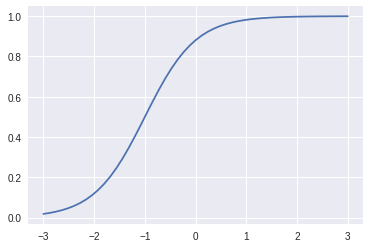

In [17]:
linear_input_unit = pnl.TransferMechanism(function=pnl.Linear(slope=2, intercept=2))
logistic_output_unit = pnl.TransferMechanism(function=pnl.Logistic())
mini_connected_network = pnl.Process(
    pathway=[linear_input_unit, pnl.IDENTITY_MATRIX, logistic_output_unit])

# Iterate and plot
xVals = np.linspace(-3, 3, num=51)
yVals = np.zeros((51,))
for i in range(xVals.shape[0]):
    yVals[i] = mini_connected_network.execute([xVals[i]])[0]
    # Progress bar
    print("-", end="")
plt.plot(xVals, yVals)
plt.show()

`IDENTITY_MATRIX` is a keyword that provides a projection from the unit preceding it to the unit following that creates a one-to-one output to input projection between the two. 

Now let's make our projection definition a bit more explicit.

---------------------------------------------------

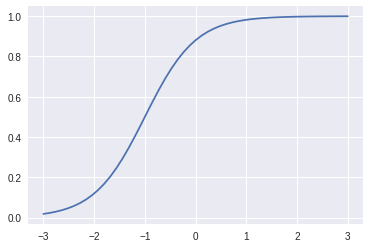

In [18]:
linear_input_unit = pnl.TransferMechanism(function=pnl.Linear(slope=2, intercept=2))
logistic_output_unit = pnl.TransferMechanism(function=pnl.Logistic())

mapping_matrix = np.asarray([[1]])
unit_mapping_projection = pnl.MappingProjection(sender=linear_input_unit,
                                            receiver=logistic_output_unit,
                                            matrix=mapping_matrix)
mini_connected_network = pnl.Process(
    pathway=[linear_input_unit, unit_mapping_projection, logistic_output_unit])

# Iterate and plot
xVals = np.linspace(-3, 3, num=51)
yVals = np.zeros((51,))
for i in range(xVals.shape[0]):
    yVals[i] = mini_connected_network.execute([xVals[i]])[0]
    # Progress bar
    print("-", end="")
plt.plot(xVals, yVals)
plt.show()

This time we specified our mapping matrix (which is a 2-D numpy array) then explicitly initialized a *[MappingProjection](https://princetonuniversity.github.io/PsyNeuLink/MappingProjection.html)* with that matrix as well as its input and output mechanisms. Note: because we specified the input and output mechanisms in the projection itself, we didn't need to include it in the process pathway as it will infer its position from those parameters. Ultimately, however, this does the exact same thing as our keyword method above which is far less verbose for this common use case.

### Systems

The highest level at which models are considered in PsyNeuLink is that of the *[System](https://princetonuniversity.github.io/PsyNeuLink/System.html)*. A system is composed of one or more processes which can then run in unison. This allows system graphs to be more complex than the strictly linear ones of processes. Our first system will consist of two input nodes that converge on a single output mechanism. We will be modelling competition between color naming and word reading in the Stroop task.  [Recall that the Stroop task involves naming the ink color of words: when the word itself mismatches with the ink color it is written in (e.g. the word RED written in blue ink), that produces conflict and slower response times to name the ink color.]  

In [0]:
colors = pnl.TransferMechanism(default_variable=[0, 0], function=pnl.Linear,
                           name="Colors")
words = pnl.TransferMechanism(default_variable=[0, 0],
                          function=pnl.Linear(slope=1.5), name="Words")
response = pnl.TransferMechanism(default_variable=[0, 0], function=pnl.Logistic,
                             name="Response")

color_naming_process = pnl.Process(pathway=[colors, pnl.IDENTITY_MATRIX, response],
                               name="Color Naming")
word_reading_process = pnl.Process(pathway=[words, pnl.IDENTITY_MATRIX, response],
                               name="Word Reading")

# Should pass in scheduler or have system create new scheduler if scheduler=None
mini_stroop = pnl.System(processes=[color_naming_process, word_reading_process],
                     name='Stroop Model')

The order of processes in the system initialization is important here as it is the order we will feed inputs to the system.

It is often useful to view models as graphs, and the following cell will generate a graph of this simple model.

In [0]:
#mini_stroop.show_graph(output_fmt = 'jupyter')
#!pip install graphviz
import graphviz 
#mini_stroop.show_graph(output_fmt = 'jupyter')

Along with graphs, you can inspect the elements of a system by using the .show( ) command shown in the following cell.  For simple models like the mini_stroop, this is not necessary.  However, when models get increasingly complex and you want to understand the flow of processing, the .show() function is quite helpful.  

In [21]:
mini_stroop.show()


---------------------------------------------------------

Stroop Model

	Control enabled: False

	Processes:
		Color Naming [learning enabled: False]
		Word Reading [learning enabled: False]

	Execution sets: 
		Set 0:
			{ Colors Words }
		Set 1:
			{ Response }


In [22]:
input = {colors: [1, 0], 
         words: [0, 1]}
mini_stroop.run(input)

[[array([0.73105858, 0.81757448])]]

An input of [1, 0] to ink is red ink, and [0, 1] is blue ink.  
An input of [1, 0] to word is "red" and [0, 1] is "blue".  
If the input values to ink and word are the same, that is a congruent trial.  If the input values to the ink and word are different that is an incongruent trial.  

In the output of the system, the first output value is the strength to respond red, and the second value is the strength to respond blue.  

In [23]:
input_dict = {colors: [0, 1],
              words: [0, 1]}
mini_stroop.run(input_dict)

[[array([0.73105858, 0.81757448])], [array([0.5       , 0.92414182])]]

As modeled, we see that word reading beats out color naming when there is conflict, but congruent stimuli elicit an even stronger response.

### Pre-trained Complete Stroop Model

Let's practice using systems by recreating the more complex stroop model from Cohen et al (1990). Later we will train the network ourselves, but for now we will explicitly model the learned weights.

In [0]:
ink_color = pnl.TransferMechanism(default_variable=[0, 0], function=pnl.Linear())
word = pnl.TransferMechanism(default_variable=[0, 0], function=pnl.Linear())
task_demand = pnl.TransferMechanism(default_variable=[0, 0], function=pnl.Linear())

hidden_layer = pnl.TransferMechanism(default_variable=[0, 0, 0, 0],
                                 function=pnl.Logistic(bias=-4))

output_layer = pnl.TransferMechanism(default_variable=[0, 0], function=pnl.Linear())

color_mapping_matrix = np.asarray([[2.2, -2.2, 0, 0], [-2.2, 2.2, 0, 0]])
color_projection = pnl.MappingProjection(sender=ink_color, receiver=hidden_layer,
                                     matrix=color_mapping_matrix)
word_mapping_matrix = np.asarray([[0, 0, 2.6, -2.6], [0, 0, -2.6, 2.6]])
word_projection = pnl.MappingProjection(sender=word, receiver=hidden_layer,
                                    matrix=word_mapping_matrix)
task_mapping_matrix = np.asarray([[4, 4, 0, 0], [0, 0, 4, 4]])
task_projection = pnl.MappingProjection(sender=task_demand, receiver=hidden_layer,
                                    matrix=task_mapping_matrix)
output_mapping_matrix = np.asarray(
    [[1.3, -1.3], [-1.3, 1.3], [2.5, -2.5], [-2.5, 2.5]])
pnl.MappingProjection(sender=hidden_layer, receiver=output_layer,
                  matrix=output_mapping_matrix)

color_naming_process = pnl.Process(pathway=[ink_color, hidden_layer, output_layer])
word_reading_process = pnl.Process(pathway=[word, hidden_layer, output_layer])
task_process = pnl.Process(pathway=[task_demand, hidden_layer, output_layer])

stroop_model = pnl.System(
    processes=[color_naming_process, word_reading_process, task_process])

ink_color.reportOutputPref = True
word.reportOutputPref = True
task_demand.reportOutputPref = True
hidden_layer.reportOutputPref = True

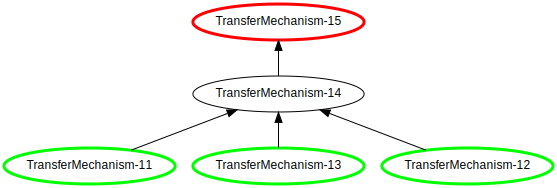

In [25]:
stroop_model.show_graph(output_fmt = 'jupyter')

In the next cell we will run the model with inputs.  The "ink_color" and "word" are the same as the previous model, and the addition of task demand allows us to specify whether the task is to name the color of ink [0, 1], or to read the word [1, 0].  The output can be thought of as activation strengths of two possible responses [red, blue]. 

In [26]:
input_dict = {ink_color: [1, 0],
              word: [1, 0],
              task_demand: [0, 1]}
stroop_model.run(input_dict)


'TransferMechanism-12'  executed:
- input:  [array([1., 0.])]
- params:
	convergence_criterion: 0.01
	convergence_function: Distance Function-2
		intercept: 0.0
		slope: 1.0
	function: Linear Function-186
		intercept: 0.0
		slope: 1.0
	initial_value: None
	integration_rate: 0.5
	integrator_mode: False
	max_passes: 1000
	noise: 0.
- output: 0.0 0.0

'TransferMechanism-11'  executed:
- input:  [array([1., 0.])]
- params:
	convergence_criterion: 0.01
	convergence_function: Distance Function-2
		intercept: 0.0
		slope: 1.0
	function: Linear Function-176
		intercept: 0.0
		slope: 1.0
	initial_value: None
	integration_rate: 0.5
	integrator_mode: False
	max_passes: 1000
	noise: 0.
- output: 0.0 0.0

'TransferMechanism-13'  executed:
- input:  [array([0., 1.])]
- params:
	convergence_criterion: 0.01
	convergence_function: Distance Function-2
		intercept: 0.0
		slope: 1.0
	function: Linear Function-196
		intercept: 0.0
		slope: 1.0
	initial_value: None
	integration_rate: 0.5
	integrator_mode: 

[[array([ 2.33608137, -2.33608137])]]

# Constructing Processes & Systems

As shown in the Stroop models above, mechanisms are the building blocks in PsyNeuLink, and projections are how these building blocks get connected.  The configuration of mechanisms connected by processes largely determine how information will flow and be processed within each model.  Next we'll explore how to build models with different configurations of mechanisms and projections, along with generating diagrams that visualize these configurations.           


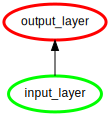

In [27]:
input_layer = pnl.TransferMechanism(
    name='input_layer',
    function=pnl.Linear,
    default_variable=np.ones((4,)),
)

output_layer = pnl.TransferMechanism(
    name='output_layer',
    function=pnl.Linear,
    default_variable=np.ones((4,)),
)

simple_process1 = pnl.Process(pathway=[input_layer, output_layer])

simple_system1 = pnl.System(
    processes=[simple_process1])

input_layer.reportOutputPref = True
output_layer.reportOutputPref = True

simple_system1.show_graph(output_fmt = 'jupyter')

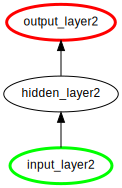

In [28]:
input_layer2 = pnl.TransferMechanism(
    name='input_layer2',
    function=pnl.Linear,
    default_variable=np.ones((4,)),
)


hidden_layer2 = pnl.TransferMechanism(
    name='hidden_layer2',
    function=pnl.Linear,
    default_variable=np.ones((4,)),
)

output_layer2 = pnl.TransferMechanism(
    name='output_layer2',
    function=pnl.Linear,
    default_variable=np.ones((4,)),
)

simple_process2 = pnl.Process(pathway=[input_layer2, hidden_layer2, output_layer2])

simple_system2 = pnl.System(processes=[simple_process2])

## the previous two lines of code builiding a 3 layer system could alternatively take the following form:

# simple_process2a = process(pathway=[input_layer2, hidden_layer2])
# simple_process2b = process(pathway=[hidden_layer2, output_layer2])
#
# simple_system2 = system(processes=[simple_process2a, simple_process2b])


input_layer2.reportOutputPref = True
hidden_layer2.reportOutputPref = True
output_layer2.reportOutputPref = True

simple_system2.show_graph(output_fmt = 'jupyter')

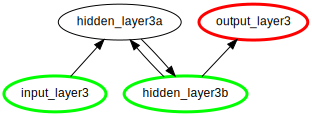

In [29]:
input_layer3 = pnl.TransferMechanism(
    name='input_layer3',
    function=pnl.Linear,
    default_variable=np.ones((4,)),
)


hidden_layer3a = pnl.TransferMechanism(
    name='hidden_layer3a',
    function=pnl.Linear,
    default_variable=np.ones((4,)),
)

hidden_layer3b = pnl.TransferMechanism(
    name='hidden_layer3b',
    function=pnl.Linear,
    default_variable=np.ones((4,)),
)

output_layer3 = pnl.TransferMechanism(
    name='output_layer3',
    function=pnl.Linear,
    default_variable=np.ones((4,)),
)

simple_process3a = pnl.Process(pathway=[input_layer3, hidden_layer3a])
simple_process3b = pnl.Process(pathway=[hidden_layer3a, hidden_layer3b])
simple_process3c = pnl.Process(pathway=[hidden_layer3b, hidden_layer3a])
simple_process3d = pnl.Process(pathway=[hidden_layer3a, hidden_layer3b])
simple_process3e = pnl.Process(pathway=[hidden_layer3b, output_layer3])


simple_system3 = pnl.System(processes=[simple_process3a, simple_process3b, simple_process3c, simple_process3d, simple_process3e])

input_layer3.reportOutputPref = True
hidden_layer3a.reportOutputPref = True
hidden_layer3b.reportOutputPref = True
output_layer3.reportOutputPref = True

simple_system3.show_graph(output_fmt = 'jupyter')

In [30]:
simple_system3.show()


---------------------------------------------------------

System-3

	Control enabled: False

	Processes:
		Process-9 [learning enabled: False]
		Process-10 [learning enabled: False]
		Process-11 [learning enabled: False]
		Process-12 [learning enabled: False]
		Process-13 [learning enabled: False]

	Execution sets: 
		Set 0:
			{ hidden_layer3b input_layer3 }
		Set 1:
			{ hidden_layer3a output_layer3 }


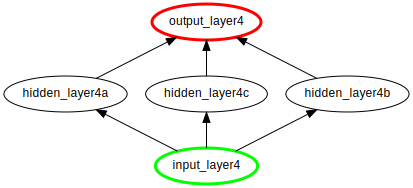

In [31]:
input_layer4 = pnl.TransferMechanism(
    name='input_layer4',
    function=pnl.Linear,
    default_variable=np.ones((4,)),
)

hidden_layer4a = pnl.TransferMechanism(
    name='hidden_layer4a',
    function=pnl.Linear,
    default_variable=np.ones((4,)),
)

hidden_layer4b = pnl.TransferMechanism(
    name='hidden_layer4b',
    function=pnl.Linear,
    default_variable=np.ones((4,)),
)

hidden_layer4c = pnl.TransferMechanism(
    name='hidden_layer4c',
    function=pnl.Linear,
    default_variable=np.ones((4,)),
)

output_layer4 = pnl.TransferMechanism(
    name='output_layer4',
    function=pnl.Linear,
    default_variable=np.ones((4,)),
)

simple_process4a = pnl.Process(pathway=[input_layer4, hidden_layer4a, output_layer4])
simple_process4b = pnl.Process(pathway=[input_layer4, hidden_layer4b, output_layer4])
simple_process4c = pnl.Process(pathway=[input_layer4, hidden_layer4c, output_layer4])


simple_system4 = pnl.System(processes=[simple_process4a, simple_process4b, simple_process4c])

input_layer4.reportOutputPref = True
hidden_layer4a.reportOutputPref = True
hidden_layer4b.reportOutputPref = True
hidden_layer4c.reportOutputPref = True
output_layer4.reportOutputPref = True

simple_system4.show_graph(output_fmt = 'jupyter')

### [End of Tutorial]


## Problem 1. Configure a System 

In order to gain more familiarity with how systems are configured, you should initialize a system and recreate the following graph as an output.  You can achieve this by copying the code used above and modifying it for this new purpose. 

![alt text](Lab1_GraphFig.png "GraphFigure")


# Dynamic Systems & Bistable Perception

There are many different ways to configure and run a model.  From the previous examples you should have a sense of how to build different configurations for a model.  In the next section we are going to explore some **dynamics** of running a model, including how information flows and is modified over time.  We will be building up to a simple model of bistable perception for a figure that people can readily interpret in two different ways.    

![alt text](Lab1_duckrabbit_Necker.png "Bistable")

Two classic examples of bistable figures are the "Duck Rabbit" seen as either of two animals (but not usually both simultaneously), and the Necker Cube, where the face of the cube that you initially see as closest to you can alternatively be interpretted as farthest away from you.  We are going to work toward a Model of settling on one interpretation of the Necker Cube, after first exploring some simple dynamic models.

## Dynamics 1: Attractor State

The following code creates a system with two mechanisms that are mutually connected by weights of -1. The output of one mechanism is multiplied by -1 and given as the input to the next mechanism, in a repeating cycle.  We can specify initial input values for each mechanism and watch it evolve over time.  

This particular mechanism will evolve toward stable values of 1 and -1.  The values 1 and -1 are determined by the difference between the initial inputs.  If the inputs are X and Y, this system will always evolve to +/-abs[X-Y]/3 (plus & minus the absolute value of the difference between the two inputs, divided by 3).  Whichever mechanism receives the larger initial input evolves to the positive value, while the smaller initial input evolves to the negative value.      

In [20]:
comp1 = pnl.Composition()

node1 = pnl.TransferMechanism(
    name='node1',
    function=pnl.Linear(slope = 1, intercept = 0),
    integrator_mode = True,
    integration_rate = 0.5,
    default_variable=np.zeros((1,)),
)

# Integrator function ((1-smoothing_factor)*previous_value + smoothing_factor*current_input) * mechanism_function

node2 = pnl.TransferMechanism(
    name='node2',
    function=pnl.Linear(slope = 1, intercept = 0),
    integrator_mode = True,
    integration_rate = 0.5,
    default_variable=np.zeros((1,)),
)

connect_1_2 = ([-1])
connect_2_1 = ([-1])

weights_1_2 = pnl.MappingProjection(
    name='connect_1_2',
    matrix=connect_1_2,
)

weights_2_1 = pnl.MappingProjection(
    name='connect_2_1',
    matrix=connect_2_1,
)

#process1 = pnl.Process(pathway=[node1, weights_1_2, node2])
#process2 = pnl.Process(pathway=[node2, weights_2_1, node1])

#system1 = pnl.System(
#    processes=[process1, process2]
#)


comp1.add_linear_processing_pathway(pathway = (node1, connect_1_2, node2, connect_2_1, node1))

node1.reportOutputPref = True
node2.reportOutputPref = True

input1 = 2
input2 = 5

input_dict = {node1: [input1,0,0,0,0,0,0,0,0,0],
             node2: [input2,0,0,0,0,0,0,0,0,0]
             }

#input_dict = {node1: [input1,1,1,1,1,1,1,1,1,1],
#             node2: [input2,1,1,1,1,1,1,1,1,1]
#             }

comp1.run(input_dict, num_trials = 5)


'node2-12' mechanism executed:
- input:  5.0
- params:
	convergence_criterion: 0.01
	convergence_function: Distance Function-2
		intercept: 0
		slope: 1
	function: Linear Function-359
		intercept: 0
		slope: 1
	initial_value: None
	integration_rate: 0.5
	integrator_mode: True
	max_passes: 1000
	noise: 0.
- output: 0.0

'node1-12' mechanism executed:
- input:  2.0
- params:
	convergence_criterion: 0.01
	convergence_function: Distance Function-2
		intercept: 0
		slope: 1
	function: Linear Function-349
		intercept: 0
		slope: 1
	initial_value: None
	integration_rate: 0.5
	integrator_mode: True
	max_passes: 1000
	noise: 0.
- output: 0.0

'node2-12' mechanism executed:
- input:  -1.0
- params:
	convergence_criterion: 0.01
	convergence_function: Distance Function-2
		intercept: 0
		slope: 1
	function: Linear Function-359
		intercept: 0
		slope: 1
	initial_value: None
	integration_rate: 0.5
	integrator_mode: True
	max_passes: 1000
	noise: 0.
- output: 0.0

'node1-12' mechanism executed:
- in

[array([-0.75]), array([0.75])]

In the previous cell, try changing the values of input1 and input2 and running the system again.  Look carefully at the code, and at the sequence of inputs and outputs when you run the system.  

We executed the system 10 times (num_trials = 10), with initial input values specified as input1 and input2, and all subsequent input values set equal to 0 in the input_dict.  What happens if you set all the subsequent input values to 1 instead of 0?  You can find out by uncommenting (remove #'s) the input_dict below the currently used input_dict (and comment out the previous version with 0s, by adding #'s at the start of those lines). 

What happens if you change the functions in the TransferMechanisms from Linear to Logistic (with default parameters, gain = 1, bias = 0, offset = 0)?  If you understand how the code is working, and how the logistic function works, then you should be able to explain the new pattern of output.  If you don't understand, ask a classmate or lab instructor.  


## Dynamics 2: Unstable Feedback Loops

While some systems evolve to fixed attractor states, others will evolve in a runaway cycle that goes continuously up or continuously down.  Still others behave chaotically.  If you give the previous system input values that are consistently different the outputs will continuously diverge.  For example if instead of both inputs being 0 or both being 1 (at each time step after the first one), the inputs are consistently different -- all 0s to node1 and all 1s to node2.  Try running the system with the following input:   

```python
input_dict = {node1: [2],
             node2: [0]
             }
```

(Note: if you only specify 1 input value for each node, the system will take this value as the input at every iterative execution.)

## Necker Cube Model

The Necker Cube is a 2D drawing with two common 3D interpretations: the faces of the cube that you see in the "front" and "back" can be reversed -- this also corresponds to seeing the 3D cube from "above" or "below."  With a little practice most people can alternate between seeing these two interpretations.  However, almost nobody looks at the figure and spontaneously sees a tangled 3D object with vertices at arbitrary depths, or a 3D "X" or any one of a vast number of other possibilities.  How you interpret the vertices seems to be a holistic (Gestalt) process where the local positions of vertices and 3D angles are fixed by a more global interpretation.  Could a network of merely local connections give rise to two distinct globally stable interpretations?  Put another way, could vertices represented with weights connecting only to a few local neighboring vertices spontaneously move toward either of two global attractor states corresponding to the two interpretations we actually see?  This question motivates the next models we will explore.  

How to model bistable interpretations of a Necker Cube is a classic example in cognitive modeling, and below are two figures from early textbooks.  

![alt text](Lab1_Feldman_NeckerFigure.png "Necker Figure 1")
![alt text](Lab1_PDP_NeckerFigure.png "Necker Figure 2")

You can get a sense from these two figures how we might label and organize a Necker cube model [Note: FUL stands for Front Upper Left, and the other abbreviations are similar.]  Take a few moments to infer as much as you can from the two figures. 

The following figure depicts how we will represent the vertices in our Necker Cube perception model.  Think of the red sides as the interpreted "front" of the cube.    

![alt text](Lab1_NeckerCode.png "Necker Figure 3")

We'll use 16 nodes, numbered 0 to 15 [because Python indexes arrays starting with 0].  The figure shows that we want activations of these 16 nodes to cluster into two groups, 0-7 and 8-15, and we want these clusters to mutually inhibit each other so that only one cluster is active together at a time, corresponding to one interpretation of the Necker Cube at a time. 

Remember that we are aiming to create this emergent order of clustering and mutual inhibition out of only local connections.  In the following cell we will create a matrix specifying the connection weights.  Look down at the second line: Build_N_Matrix[0,:] = [0, 1, 3, 4, 8].  You can think of the numbers [0, 1, 3, 4, 8] like this: the first number [0] is a vertex (more specifically, it is a particular 3D interpretation of the spatial position of that vertex), the next three numbers [1, 3, 4] are vertex interpretations that will have excitatory connections to [0], and the last number [8] will have an inhibitory connection to [0].  Now look back at the figure above to fully understand this schematic.  In the left cube 0 is connected by an edge to three other vertices [1, 3, 4].  In the right cube, vertex 8 is in the same position as 0 but has the opposite depth interpretation: 0 and 8 are mutually exclusive interpretations, and their activations should be inversely related using mutual inhibition.        

In [21]:
Build_N_Matrix = np.zeros((16,5))
Build_N_Matrix[0,:] = [0, 1, 3, 4, 8]
Build_N_Matrix[1,:] = [1, 0, 2, 5, 9]
Build_N_Matrix[2,:] = [2, 1, 3, 6, 10]
Build_N_Matrix[3,:] = [3, 0, 2, 7, 11]
Build_N_Matrix[4,:] = [4, 5, 7, 0, 12]
Build_N_Matrix[5,:] = [5, 4, 6, 1, 13]
Build_N_Matrix[6,:] = [6, 5, 7, 2, 14]
Build_N_Matrix[7,:] = [7, 4, 6, 3, 15]
Build_N_Matrix[8,:] = [8, 9, 11, 12, 0]
Build_N_Matrix[9,:] = [9, 8, 10, 13, 1]
Build_N_Matrix[10,:] = [10, 9, 11, 14, 2]
Build_N_Matrix[11,:] = [11, 8, 10, 15, 3]
Build_N_Matrix[12,:] = [12, 13, 15, 8, 4]
Build_N_Matrix[13,:] = [13, 12, 14, 9, 5]
Build_N_Matrix[14,:] = [14, 13, 15, 10, 6]
Build_N_Matrix[15,:] = [15, 12, 14, 11, 7]

Build_N_Matrix = Build_N_Matrix.astype(int)

Necker_Matrix = np.zeros((16,16))
Necker_Matrix = Necker_Matrix.astype(int)


excite = 1
inhibit = -2

for x in range(0,16):
    Necker_Matrix[Build_N_Matrix[x,0], Build_N_Matrix[x,1]] = excite
    Necker_Matrix[Build_N_Matrix[x,0], Build_N_Matrix[x,2]] = excite
    Necker_Matrix[Build_N_Matrix[x,0], Build_N_Matrix[x,3]] = excite
    Necker_Matrix[Build_N_Matrix[x,0], Build_N_Matrix[x,4]] = inhibit
   
    
Necker_Matrix

array([[ 0,  1,  0,  1,  1,  0,  0,  0, -2,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  1,  0,  0,  1,  0,  0,  0, -2,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  1,  0,  0,  0, -2,  0,  0,  0,  0,  0],
       [ 1,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0, -2,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0, -2,  0,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0, -2,  0,  0],
       [ 0,  0,  1,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0, -2,  0],
       [ 0,  0,  0,  1,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0, -2],
       [-2,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  1,  0,  0,  0],
       [ 0, -2,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  1,  0,  0],
       [ 0,  0, -2,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0, -2,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, -2,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  0, -2,  0,  0,  0,  1,  0,

Now that we have a matrix that specifies the connection strengths between all 16 units, we can build a model that starts with random activations (between 0 and 1) and passes these values through the weight matrix over and over.  In most cases running this model will lead to the first 8 units (corresponding to the first 3D interpretation) firing in a simlar way, and the second 8 units (corresponding to the alternative 3D interpretation) firing together in the opposite way as the first 8.  Note that this model is very rudimentary and there are lots of ways that you can improve it!  

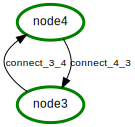

In [0]:
node3 = pnl.TransferMechanism(
    name='node3',
    function=pnl.Linear(slope = 1, intercept = 0),
    integrator_mode = True,
    smoothing_factor = .5,
    default_variable=np.zeros((1,16)),
)


#integrator function ((1-rate)*previous_value + rate*current_input) * mechanism_function

node4 = pnl.TransferMechanism(
    name='node4',
    function=pnl.Linear(slope = 1, intercept = 0),
    integrator_mode = True,
    smoothing_factor = .5,
    default_variable=np.zeros((1,16)),
)


connect_3_4 = Necker_Matrix
connect_4_3 = Necker_Matrix

weights_3_4 = pnl.MappingProjection(
    name='connect_3_4',
    matrix=connect_3_4,
)

weights_4_3 = pnl.MappingProjection(
    name='connect_4_3',
    matrix=connect_3_4,
)

process3 = pnl.Process(pathway=[node3, weights_3_4, node4])
process4 = pnl.Process(pathway=[node4, weights_4_3, node3])


system2 = pnl.System(
    processes=[process3, process4]
)
                            
node3.reportOutputPref = True
node4.reportOutputPref = True

system2.show_graph(output_fmt = 'jupyter')

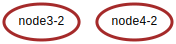

In [24]:
comp2 = pnl.Composition()

node3 = pnl.TransferMechanism(
    name='node3',
    function=pnl.Linear(slope = 1, intercept = 0),
    integrator_mode = True,
    integration_rate = .5,
    default_variable=np.zeros((1,16)),
)


#integrator function ((1-rate)*previous_value + rate*current_input) * mechanism_function

node4 = pnl.TransferMechanism(
    name='node4',
    function=pnl.Linear(slope = 1, intercept = 0),
    integrator_mode = True,
    integration_rate = .5,
    default_variable=np.zeros((1,16)),
)


connect_3_4 = Necker_Matrix
connect_4_3 = Necker_Matrix

weights_3_4 = pnl.MappingProjection(
    name='connect_3_4',
    matrix=connect_3_4,
)

weights_4_3 = pnl.MappingProjection(
    name='connect_4_3',
    matrix=connect_3_4,
)

# old syntax
#process3 = pnl.Process(pathway=[node3, weights_3_4, node4])
#process4 = pnl.Process(pathway=[node4, weights_4_3, node3])
#system2 = pnl.System(
#    processes=[process3, process4]
#)

# new syntax
comp2.add_linear_processing_pathway(pathway = (node3, connect_3_4, node4, connect_4_3, node3))

node3.reportOutputPref = True
node4.reportOutputPref = True

comp2.show_graph(output_fmt = 'jupyter')

In [26]:
input_dict = {node3: np.random.random((1,16)),
             node4: np.random.random((1,16))
             }

comp2.run(input_dict, num_trials = 10)


'node3-2' mechanism executed:
- input:  [array([ 1399.69103949,   339.3380638 ,  1405.25052261,  -423.32111836,
         131.89416196,  1409.85428257,   -49.31652869,  1615.14244218,
         -43.371084  , -1292.48788272,   139.40493214, -1499.67505074,
       -1503.83623506,  -415.70510587, -1509.58594048,   346.63894665])]
- params:
	convergence_criterion: 0.01
	convergence_function: Distance Function-2
		intercept: 0
		slope: 1
	function: Linear Function-427
		intercept: 0
		slope: 1
	initial_value: None
	integration_rate: 0.5
	integrator_mode: True
	max_passes: 1000
	noise: 0.
- output: 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

'node4-2' mechanism executed:
- input:  [array([   43.04276861,  1358.26188005,  -140.21654537,  1565.30829724,
        1569.47730941,   415.01285088,  1574.86490414,  -346.82751006,
       -1452.51924972,  -326.45937911, -1458.8833525 ,   435.55869316,
        -119.61319911, -1463.22958609,    62.08396022, -1667.86768981])]
- params:

[array([ 17513407.31955327,     34643.22191657,  17515381.51232287,
          -225548.19891459,    -36083.99675906,  17516863.23535342,
           -98245.17085776,  17587168.71660511,     64380.28930566,
        -17479230.74472387,    126544.74188635, -17549536.83223069,
        -17551016.66162242,    -62922.34526489, -17552991.99238531,
           197270.94090459]),
 array([   -63036.55015469,  17467082.60995643,   -125201.12943254,
         17537388.79137459,  17538868.67502423,     64266.03276253,
         17540843.68776558,   -195927.35215624, -17501236.67890023,
           -35967.38387354, -17503211.18969137,    224223.93820832,
            34759.81109664, -17504692.85846402,     96920.85849817,
        -17574998.24580436])]

In [30]:
for i in range(1,10):
  input_dict = {node3: np.random.random((1,16)),
             node4: np.random.random((1,16))
             }

  comp2.run(execution_id = i, inputs=input_dict, num_trials = 2)
  


'node3-2' mechanism executed:
- input:  [array([0.80444389, 0.44771405, 0.14752138, 0.68234529, 0.01220513,
       0.67547346, 0.34177292, 0.75716648, 0.06922971, 0.48625025,
       0.85696311, 0.24714172, 0.11803763, 0.05839919, 0.78688155,
       0.02959265])]
- params:
	convergence_criterion: 0.01
	convergence_function: Distance Function-2
		intercept: 0
		slope: 1
	function: Linear Function-427
		intercept: 0
		slope: 1
	initial_value: None
	integration_rate: 0.5
	integrator_mode: True
	max_passes: 1000
	noise: 0.
- output: 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

'node4-2' mechanism executed:
- input:  [array([0.06944245, 0.15853044, 0.9377781 , 0.89653501, 0.01267025,
       0.15548412, 0.01981443, 0.09363011, 0.64226978, 0.86327126,
       0.65522795, 0.99644955, 0.16896198, 0.44014114, 0.17999783,
       0.61773296])]
- params:
	convergence_criterion: 0.01
	convergence_function: Distance Function-2
		intercept: 0
		slope: 1
	function: Linear Function-43

We can simplify the whole Necker Cube model above by using a single Recurrent Transfer Mechanism with connections to itself, instead of two processing mechanisms, and get approximately the same results.  In the previous model we specified a connecting matrix (Necker_Matrix) between the two nodes. A RecurrentTransferMechanism allows us to place this matrix inside of the mechanism, connecting its output at one step back to its input at the next step.      

In [0]:
Necker_Loop = pnl.RecurrentTransferMechanism(
    size=16,
    function=pnl.Linear,
    matrix=Necker_Matrix,
    #learning = False,
    #smoothing_factor = 1,
    noise = 0
)

processA = pnl.Process(pathway=[Necker_Loop])

system2b = pnl.System(
    processes=[processA]
)
                       
    
input_dict = {Necker_Loop: np.random.random((1,16))*.5
             }

system2b.run(input_dict, num_trials = 10)

[[array([0.45743906, 0.09959535, 0.02910072, 0.08272449, 0.04480366,
         0.18601199, 0.12377373, 0.23367596, 0.22966303, 0.24540836,
         0.40439444, 0.24221099, 0.36299898, 0.39426253, 0.14116204,
         0.28882468])],
 [array([ 0.22523649,  0.28133039, -0.47359459,  0.31851825,  0.1959327 ,
         -0.33434033,  0.29023832, -0.09267153,  0.16540325,  1.07453766,
          0.97497439,  0.99964415,  1.18614191,  0.77180793,  0.98109622,
          0.56784477])],
 [array([ 0.92241389, -2.6321784 , -1.03076111, -2.25759345, -2.52925553,
         -0.59010246, -2.73902516, -0.09732431,  3.03951379,  1.59493316,
          4.40686165,  1.3133969 ,  1.47618952,  4.30471898,  1.87531248,
          3.64105002])],
 [array([-13.0406159 ,  -3.78872065, -16.41341959,  -2.74974084,
          -2.67258827, -16.32388506,  -5.34503912, -14.57429822,
           2.76935485,  17.26085958,   7.2495592 ,  15.84482334,
          16.40679282,   6.52090261,  17.97184301,   5.14837221])],
 [array([-14

### Necker Cube Notes 

The Necker Cube perception models presented here are very simple and have lots of room for improvement.  You can modify these models to make them better.  For example, over multiple trials the activations run away to very high and very low values.  This is unrealistic -- How might you fix this problem?  If you come up with a good solution you can get credit for it on the open ended BUILD section of the homework below.           

# Homework

### Problem 1: see "Problem 1: Configure a System" in context above. [Recreate the figure]

### Problem 2: Duck/Rabbit Model
**Create your own models of bistable perception for the Duck/Rabbit figure.**
Requirements:
Your models must include the following 6 features.  Ears, Bill, LeftFront, LeftBack, RightFront, RightBack. 
Your models must initialize with random activations and then dynamically arrive at stable interpretations. 

2a.  Create a model that always arrives at a coherent interpretation: ALL DUCK [Bill, LeftFront, RightBack] OR ALL RABBIT [Ears, RightFront, LeftBack]. 

2b.  Create a model that usually arrives at a coherent interpretation, but sometimes mixes up the features.  Run the model at least 100 times, and report percentages of the distinct interpretations.  Explain the difference between the stable and less stable model and what causes the flips when the interpretation changes.  

### Problem 3: Duck/Rabbit Model with Spontaneous Reversals

When looking at some bistable figures, after a certain amount of time your interpretation spontaneously flips to the opposite of what you previously saw.

3a.  Create a model that arrives at a coherent interpretation (All Duck OR All Rabbit), but then gradually fatigues and spontaneously and reliably switches to the opposite interpretation.   


### Problem 4: BUILD (B)eneficial (U)nlimmited (I)ndependent (L)earning (D)ocumented. 

For every homework assignment you have an opportunity to earn credit for related content & skills that you learn going beyond the lab notebooks.  This component is required, but you are in charge.  Sources for this portion of the assignment can include scientific results in published journal articles, notes from your efforts to modify models or build new models, the documentation on PsyNeuLink, Python tutorials, code tips from StackOverflow, or explanations on Wikipedia. 

This portion of the assignment is intended to let every individual student gain knowledge and skills (and course credit) working from your own current level of understanding.  If you are brand new to coding, you can use this as an opportunity to practice writing code and communicate what you learned.  If you are a proficient programmer, but relatively new to Psychology and/or Neuroscience, you can use this BUILD section to read more on relevant topics and concisely summarize what you learned.  If you are a proficient programmer and familiar with Psychology & Neuroscience, you can go above and beyond the assignment by creating a more sophisticated model or fitting a data set that interests you.    

As you are working through the homework problems, simply make notes about interesting things you learned.  The ideal format for these notes is a reference guide for your future self to productively review, **written entirely in your own words**.  

Here are some sample notes of the kind that could appear in the BUILD section of your homework.

Lab1 notebook mentions the SoftMax function, so I looked it up to learn more.   
**Softmax Function** Basically, this function takes a collection of numbers and emphasizes their relative magnitudes--especially making the largest number more pronounced.  This function could be useful if you have a competition and want to highlight the winner, giving it extra weight for a subsequent computation.  The way softmax works is by first treating each number as an exponent.  Assume we start with the numbers [2, 3, 4]. If our base is 2 [the actual softmax function uses the natural logarithm e as its base rather than 2 -- but base 2 is easier for me to double check the math in my head as I go.], then the first step changes the numbers to [2^2, 2^3, 2^4] or [4, 8, 16].  While 2 and 4 started out close together, the difference between 4 and 16 is much larger.  The next step is to add all the numbers together (4+8+16) = 28.  Then we divide all the numbers by the total of 28; [4/28, 9/28 16/28].  Now the sum of all the numbers in our collection is 1, and their relative magnitudes have been exagerated.  Having all the numbers sum to 1 might also be useful if we want to treat them as probabilities. 

The idea of bistable perception is fascinating, and it made me wonder about other examples.  A Google search brought me to a dynamic example called the **"Spinning Dancer"** that can be seen as spinning either clockwise or counterclockwise.  Strangely, this bistable figure is difficult to intentionally see as the opposite interpretation from whatever you saw first.  I got stuck on clockwise and my roommate got stuck on counterclockwise.  I wonder why this is?  Maybe it has to do with fatigue.  It might be harder to fatigue neurons looking at motion.  It would be interesting to design some experiments or come up with a model that could explain what is happening with the spinning dancer and why it is different than the Necker Cube and Duck-Rabbit.       

While I was trying to get the first duck/rabbit model to work I realized I didn't really understand a bunch of the code, so I starting reading more about **numpy** functions and the **PsyNeuLink documentation**.  Here are some concepts I learned about that I think might be helpful later in the course (all the following concepts are defined in my own words, not copied/pasted)... 
[lots of examples here]





# How to Format & Submit Homework

Your homework should be completed in a new Jupyter notebook that you create on the server (File -> New Notebook -> Python 3).  Be sure to include the import packages cells for numpy and PsyNeuLink.  Name the notebook with your last name and the assignment: LastName_Lab1_homework.ipynb.  It must be formatted clearly, like the lab notebooks, with text primarily in Markdown cells using headings and subheadings, and code primarily in code cells.  After you have completed everything, save the notebook, then select Kernel -> Restart & Run All.  Double check that your code cells have all executed and produced the intended outputs.  Then choose File -> Print Preview.  This will create a new version of your Jupyter notebook as a static web page formatted in html.  Save this page as a pdf:  Use a Google search "how to convert a webpage from [browser] to pdf" [replace "browser" with Chrome, Explorer, Safari, Firefox or whatever browser you use, and follow the instructions you find].  Finally, name this document LastName_Lab1_homework.pdf and submit the pdf on Blackboard.  

Please note the importance of formatting your homework to appear clear, well-labeled and easy to read.  Make judgment calls about how much output is too much to include (e.g. don't include output longer than 1 page from a single executed cell).  There are ways to adjust the code to only display what is necessary.  Use headings to highlight the different questions.  Use the internet to help you, e.g. Google search: How to get italics in Markdown.  


# Homework Grading

Each assignment is graded out of 10 points.  
**3 Completeness**: Did you answer all the questions thoughtfully?  If you are unable to arrive at a satisfactory answer, you should still include all your attempts with annotation explaining what you did and what problems you encountered.   
**3 Clarity**: Your homework should be well organized and easy to read.  Use the Markdown formatting options for headings and subheadings.  It is important to communicate effectively.         
**3 Creativity**: BUILD section.  Problem solving in real life is typically open-ended and the solutions are not known by anyone in advance (otherwise you would just look them up.)  We want you to creatively engage with the course material, apply the concepts you learn to new topics, and to build your own new models.      
**1 Collaboration**: You must attend lab and participate.  Your homework should include acknowledgments indicating who you collaborated with on the assignment.   


For the completeness, clarity, and creativity, the rubric is approximately as follows:
(1) Sub-par, (2)Respectable, (3)Impressive.  



# Collaboration Policy & Individual Work

All prose in your homework submissions must be written by you alone, unless the assignment explicitly calls for a group submission.  

You are strongly encouraged to collaborate with classmates on the homework assignments, and you are allowed to share code as you collaborate.  However, you should never submit code that you do not understand.  If a classmate, tutor, or lab instructor helps you with writing code, it is up to you to understand and annotate that code (using #comments or Markdown cells) in your own words explaining how the code works. 

When you collaborate, always include an author note at the start of the assignment that acknowledges your collaborators.  
